In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [20]:
inf_times = pd.read_csv('cao_linear_inference_times.csv')

pij_inf_times = pd.read_csv('pij_linear_inference_times.csv')
cellno = pij_inf_times.loc[10]['cell_numbers']
pij_inf_times = pij_inf_times.query('cell_numbers <= @cellno')

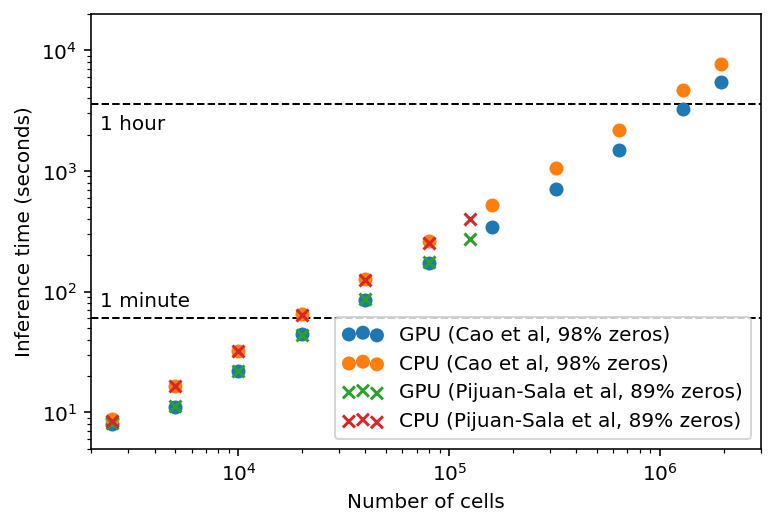

In [45]:
plt.loglog()

label_ = 'GPU (Cao et al, 98% zeros)'
plt.scatter(inf_times.cell_numbers, inf_times.gpu_inference_time, label=label_)
label_ = 'CPU (Cao et al, 98% zeros)'
plt.scatter(inf_times.cell_numbers, inf_times.cpu_inference_time, label=label_)

label_ = 'GPU (Pijuan-Sala et al, 89% zeros)'
plt.scatter(pij_inf_times.cell_numbers, pij_inf_times.gpu_inference_time, marker='x', label=label_)
label_ = 'CPU (Pijuan-Sala et al, 89% zeros)'
plt.scatter(pij_inf_times.cell_numbers, pij_inf_times.cpu_inference_time, marker='x', label=label_)

plt.legend(scatterpoints=3, loc='lower right')

plt.xlabel('Number of cells')
plt.ylabel('Inference time (seconds)');
plt.axhline(60, lw=1, ls='--', c='k', zorder=-1);
plt.axhline(60 * 60, lw=1, ls='--', c='k', zorder=-1);

plt.annotate('1 hour', (2200, 2200));
plt.annotate('1 minute', (2200, 75));

plt.xlim(left=2e3, right=3e6)
plt.ylim(bottom=5e0, top=2e4);

plt.savefig('figures/cells-v-time.pdf')

In [30]:
inf_times.cpu_inference_time / inf_times.cell_numbers * 1000

0     3.506214
1     3.318517
2     3.250150
3     3.244365
4     3.185527
5     3.260367
6     3.284209
7     3.290520
8     3.411818
9     3.632951
10    3.916161
dtype: float64

In [31]:
inf_times.gpu_inference_time / inf_times.cell_numbers * 1000

0     3.222039
1     2.216267
2     2.207741
3     2.217465
4     2.134612
5     2.142937
6     2.136206
7     2.201628
8     2.306445
9     2.555671
10    2.805114
dtype: float64

In [38]:
inf_histo = pd.read_csv('cao_linear_train_history.csv', index_col=0)

In [39]:
colors = cm.get_cmap('viridis', inf_histo.shape[0])

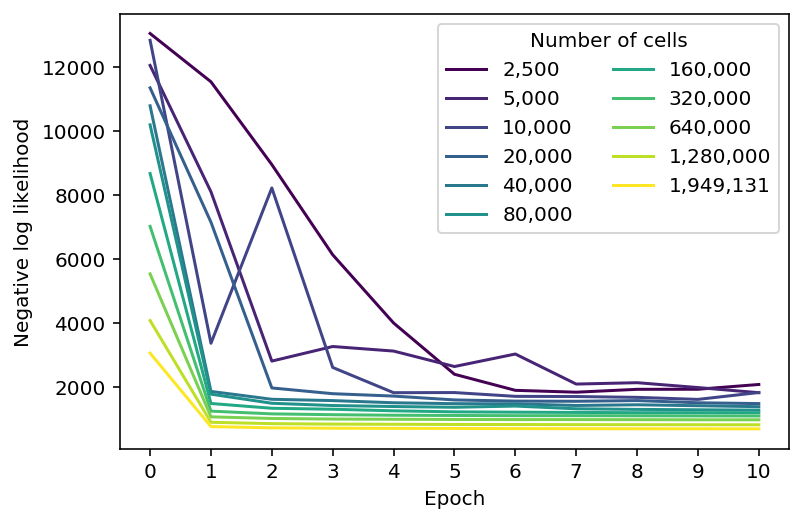

In [44]:
i = 0
for n, h in inf_histo.iterrows():
    plt.plot(h, label=f'{n:,}', c=colors(i / inf_histo.shape[0]))
    i += 1
    
plt.xlabel('Epoch')
plt.ylabel('Negative log likelihood');
plt.legend(title='Number of cells', ncol=2);

plt.savefig('figures/epoch-v-ll.pdf')